In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM
# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [1]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
setwd('/import/DB/fel/BJTC-204')

In [3]:
load('combat_edata_matrix3.rda')

In [4]:
combat_edata1 = t(combat_edata1) %>% as.data.frame()

In [5]:
Group = anno$group

In [6]:
expr3 = cbind(Group,combat_edata1)

In [7]:
set.seed(17)  
index <-  which( (1:nrow(expr3))%%4 == 0 )
train <- expr3[-index,]
test <- expr3[index,]

In [8]:
table(test$Group)


CON MDD 
 56  33 

In [9]:
save(test,file = 'test.rda')

In [10]:
table(train$Group)


CON MDD 
172  96 

In [11]:
gene19 = read.table('./gene3639.res.txt',col.names = 'gene')

In [12]:
gene19$gene = gsub('-','.',gene19$gene)

In [13]:
a = intersect(gene19$gene,colnames(train))

In [14]:
a

[1] "RSL1D1"   "F12"      "GNE"      "TRIAP1"   "HSPB11"   "CLPTM1"  
  [7] "BAIAP3"   "SMARCD3"  "DBNDD1"   "AACS"     "WDR82"    "PAK6"    
 [13] "ICAM5"    "HPCAL4"   "CAMK1G"   "POP7"     "MRPL46"   "CES2"    
 [19] "PIM2"     "STOML1"   "BAP1"     "DBP"      "PPID"     "CYB561"  
 [25] "FBXO41"   "NEUROD6"  "AURKAIP1" "EEF1E1"   "MLF2"     "GLRX2"   
 [31] "PCSK1"    "RAD23A"   "ENDOG"    "ELAVL4"   "LIMK1"    "NUAK1"   
 [37] "ERCC1"    "C1orf216" "RALB"     "UBE2M"    "SMYD3"    "PINK1"   
 [43] "APEX1"    "C12orf43" "NIPSNAP1" "EIF1B"    "GLRX5"    "DCTN3"   
 [49] "IDH3B"    "GOT1"     "HS3ST2"   "NDUFB6"   "UCHL1"    "SKAP2"   
 [55] "SFXN3"    "SIAH2"    "VTI1B"    "CISD1"    "ATP6V0C"  "TM6SF1"  
 [61] "NBEA"     "PID1"     "RFK"      "ATP6V1A"  "DNM1L"    "GNB5"    
 [67] "CYTH2"    "PRKAR1B"  "MDH2"     "DBN1"     "PRPS1"    "AP1S1"   
 [73] "PRSS3"    "REPS2"    "CIAPIN1"  "G3BP2"    "ME3"      "RABEPK"  
 [79] "NDRG3"    "NDUFAB1"  "PGK1"     "PTS"      "PORCN"    "ACOT7"   
 [85] "AMPH"     "THY1"     "CALB2"    "ADORA1"   "COX5A"    "COX7B"   
 [91] "DYNC1I1"  "DOC2A"    "RIT2"     "TBR1"     "NDUFA9"   "PIN1"    
 [97] "RIMS1"    "SEZ6L2"   "RUSC1"    "GPX4"     "SUMO3"    "SLC8A2"  
[103] "RABIF"    "EPB41L1"  "SPINT2"   "ANXA6"    "UQCRC1"   "TUBG2"   
[109] "GDAP1L1"  "KCNAB1"   "ITFG1"    "GABRA5"   "RAD51C"   "ACTR1B"  
[115] "PPIE"     "ACTR10"   "ARMCX2"   "LYRM4"    "TBC1D9"   "MED6"    
[121] "DDRGK1"   "PTPRN2"   "NEDD8"    "KCNAB2"   "ATP2B2"   "PSME3"   
[127] "OLFM1"    "AKAP12"   "SAE1"     "STMN4"    "DDA1"     "PPP3R1"  
[133] "CCKBR"    "IDS"      "GABRD"    "B4GALT3"  "KCNJ9"    "GNG3"    
[139] "KCNK1"    "FBXL15"

In [15]:
train = train[,c('Group',a)]

In [16]:
x = as.matrix(train[,2:dim(train)[2]])
y = ifelse(train$Group == 'CON',0,1)

In [17]:
library(dplyr)

In [18]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




In [19]:
set.seed(111)

In [20]:
rf = randomForest(as.factor(y)~.,data = x,ntree =2000,important=TRUE,proximity=TRUE)

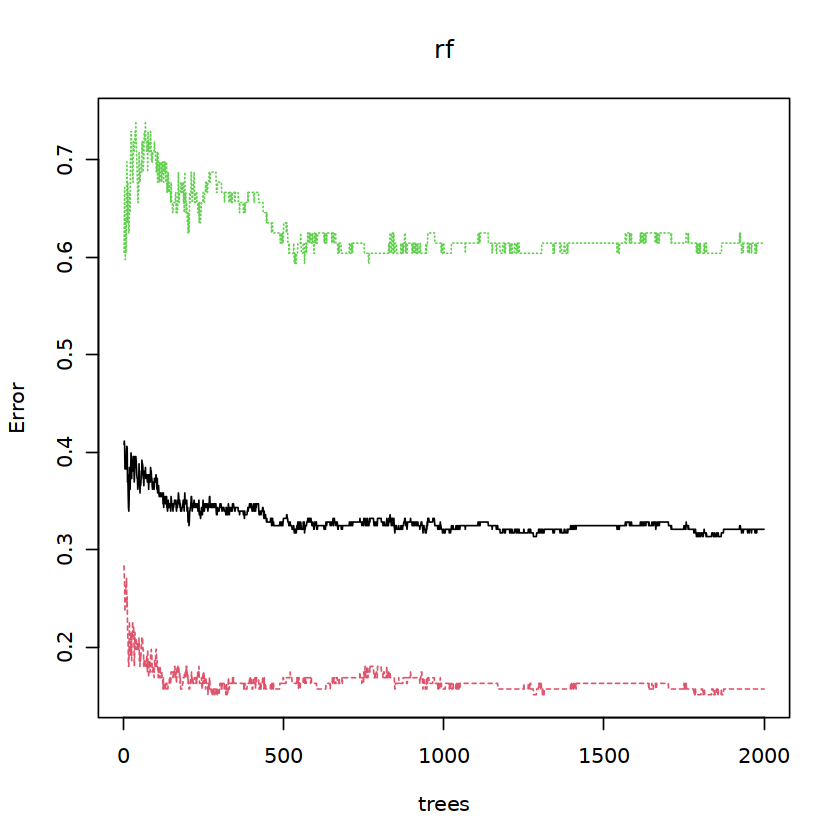

In [21]:
plot(rf)

In [22]:
pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

In [23]:
trees = which.min(rf$err.rate[,1])

In [24]:
rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

In [25]:
importance = importance(rf)

In [26]:
pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

png 
  2

In [27]:
# RPE65 + MC3R+NFIL3 + PRF1 + IL6

In [28]:
options(repr.plot.width = 4)

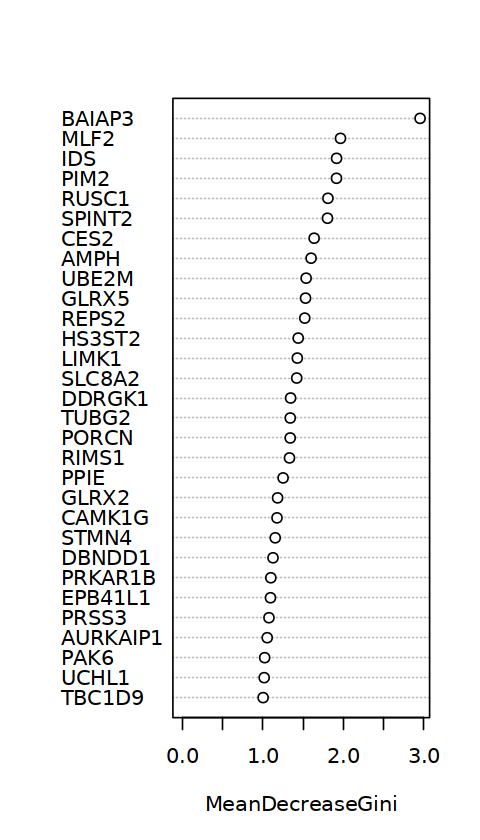

In [29]:
varImpPlot(rf,main = '')

In [30]:
rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

In [31]:
rfGenes

BAIAP3      MLF2       IDS      PIM2     RUSC1    SPINT2      CES2      AMPH 
2.9520740 1.9635860 1.9147823 1.9137578 1.8073763 1.8019973 1.6362283 1.5982343 
    UBE2M     GLRX5     REPS2    HS3ST2     LIMK1    SLC8A2    DDRGK1     TUBG2 
1.5367938 1.5293405 1.5196668 1.4383810 1.4269661 1.4199404 1.3439648 1.3396859 
    PORCN     RIMS1      PPIE     GLRX2    CAMK1G     STMN4    DBNDD1   PRKAR1B 
1.3389405 1.3300098 1.2505193 1.1819149 1.1748726 1.1528614 1.1252142 1.0981558 
  EPB41L1     PRSS3  AURKAIP1      PAK6     UCHL1    TBC1D9    HPCAL4    SEZ6L2 
1.0939570 1.0751214 1.0534041 1.0217690 1.0157151 1.0025700 0.9897257 0.9670661 
   ADORA1     CYTH2    KCNAB2       DBP    NDUFB6     SFXN3   B4GALT3     DOC2A 
0.9566885 0.9544473 0.9535852 0.9490480 0.9406423 0.9322382 0.9265703 0.9053421 
   MRPL46     VTI1B    HSPB11       F12   DYNC1I1     EIF1B    TRIAP1      THY1 
0.9037013 0.8997623 0.8994815 0.8955402 0.8905635 0.8848190 0.8841568 0.8719933 
    ERCC1     CALB2   GDAP1L1      TBR1      DDA1    NDUFA9       GNE     IDH3B 
0.8615229 0.8562441 0.8455700 0.8404960 0.8381505 0.8302289 0.8121041 0.8107628 
  ATP6V0C    FBXL15    RAD51C     AP1S1    RSL1D1     GABRD    RABEPK      DBN1 
0.8087340 0.8061947 0.7937012 0.7936584 0.7908240 0.7789563 0.7781618 0.7726933 
    WDR82    FBXO41     APEX1      NBEA      RALB     NDRG3       ME3      BAP1 
0.7692232 0.7662193 0.7645220 0.7552477 0.7540536 0.7518554 0.7515812 0.7509870 
     PID1    ARMCX2    KCNAB1    CYB561      MED6    CLPTM1   NEUROD6       RFK 
0.7504838 0.7488646 0.7457658 0.7419485 0.7367178 0.7360265 0.7316205 0.7304956 
 C1orf216     ENDOG    ACTR1B     ICAM5     OLFM1      MDH2    ATP2B2      POP7 
0.7300480 0.7287330 0.7259549 0.7223601 0.7215665 0.7209078 0.7203622 0.7177319 
    KCNJ9     SMYD3     SIAH2  NIPSNAP1    RAD23A      GPX4     RABIF     NUAK1 
0.7175545 0.7167396 0.7142393 0.7126909 0.6903125 0.6902137 0.6893177 0.6840573 
    CCKBR    STOML1    PPP3R1     PINK1   ATP6V1A    EEF1E1     ANXA6     KCNK1 
0.6833209 0.6782514 0.6746935 0.6719519 0.6644049 0.6643871 0.6643674 0.6526216 
   UQCRC1    ELAVL4   CIAPIN1    AKAP12      RIT2   SMARCD3    ACTR10    PTPRN2 
0.6485600 0.6472320 0.6427521 0.6426119 0.6386547 0.6320432 0.6313327 0.6291154 
    DCTN3  C12orf43   NDUFAB1     DNM1L      PGK1     NEDD8     PSME3     PRPS1 
0.6269955 0.6253412 0.6203814 0.6196322 0.6186386 0.6176013 0.6147967 0.6129962 
     GOT1     ITFG1      SAE1      AACS     ACOT7     LYRM4     COX7B     PCSK1 
0.6114851 0.6051045 0.6007689 0.5985454 0.5911031 0.5832123 0.5813806 0.5810874 
      PTS      PIN1      GNG3     COX5A     CISD1      PPID    TM6SF1      GNB5 
0.5809300 0.5793921 0.5603475 0.5596311 0.5583804 0.5523013 0.5427856 0.5183379 
    SKAP2     SUMO3    GABRA5     G3BP2 
0.5137360 0.5070027 0.4996709 0.4609869

In [32]:
# rfGenes=names(rfGenes[rfGenes>30]) 
# write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

# expr2 = exp4

# sigExp=expr2[rfGenes,]
# write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

# rfGenes

### svm

In [33]:
# library(tidyverse)
# library(glmnet)
# library(VennDiagram)
# library(e1071)
# library(caret)
# library(randomForest)

# x = as.matrix(expr)

# y=as.numeric(as.factor(Type))

# library(future)
# plan("multisession",workers=30)

# set.seed(1)
# rfeControl = rfeControl(functions = caretFuncs,
#                         method = "cv", # 默认自助法重采样 boot
#                         saveDetails = T, # 保存预测值和变量重要性
#                         number = 5, # 重抽样次数
#                         allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
#                         )

# Profile=rfe(x=x,y=as.factor(y),sizes =c(1:32),
#     rfeControl =  rfeControl,
#     methods="svmRadial")

# Profile

# pdf(file="SVM-RFE.pdf", width=6, height=5.5)
# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
# dev.off()

# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

# #输出
# featureGenes = Profile$optVariables
# write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

# featureGenes

### Boruta

In [34]:
y

[1] 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0
 [38] 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 [75] 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1
[112] 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0
[260] 1 0 1 0 0 1 1 0 0

In [35]:
library(Boruta)

In [36]:
set.seed(111)
boruta <- Boruta(x=x, y=as.factor(y), pValue=0.05, mcAdj=T, 
       maxRuns=300)

In [37]:
boruta

Boruta performed 299 iterations in 20.46549 secs.
 14 attributes confirmed important: AMPH, BAIAP3, GLRX2, GLRX5, HS3ST2
and 9 more;
 123 attributes confirmed unimportant: AACS, ACOT7, ACTR10, ACTR1B,
ADORA1 and 118 more;
 3 tentative attributes left: ARMCX2, EIF1B, REPS2;

In [38]:
table(boruta$finalDecision)


Tentative Confirmed  Rejected 
        3        14       123 

In [39]:
boruta$finalDecision

RSL1D1       F12       GNE    TRIAP1    HSPB11    CLPTM1    BAIAP3   SMARCD3 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected Confirmed  Rejected 
   DBNDD1      AACS     WDR82      PAK6     ICAM5    HPCAL4    CAMK1G      POP7 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
   MRPL46      CES2      PIM2    STOML1      BAP1       DBP      PPID    CYB561 
 Rejected  Rejected Confirmed  Rejected  Rejected  Rejected  Rejected  Rejected 
   FBXO41   NEUROD6  AURKAIP1    EEF1E1      MLF2     GLRX2     PCSK1    RAD23A 
 Rejected  Rejected  Rejected  Rejected Confirmed Confirmed  Rejected  Rejected 
    ENDOG    ELAVL4     LIMK1     NUAK1     ERCC1  C1orf216      RALB     UBE2M 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected Confirmed 
    SMYD3     PINK1     APEX1  C12orf43  NIPSNAP1     EIF1B     GLRX5     DCTN3 
 Rejected  Rejected  Rejected  Rejected  Rejected Tentative Confirmed  Rejected 
    IDH3B      GOT1    HS3ST2    NDUFB6     UCHL1     SKAP2     SFXN3     SIAH2 
 Rejected  Rejected Confirmed  Rejected  Rejected  Rejected  Rejected  Rejected 
    VTI1B     CISD1   ATP6V0C    TM6SF1      NBEA      PID1       RFK   ATP6V1A 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
    DNM1L      GNB5     CYTH2   PRKAR1B      MDH2      DBN1     PRPS1     AP1S1 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
    PRSS3     REPS2   CIAPIN1     G3BP2       ME3    RABEPK     NDRG3   NDUFAB1 
 Rejected Tentative  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
     PGK1       PTS     PORCN     ACOT7      AMPH      THY1     CALB2    ADORA1 
 Rejected  Rejected  Rejected  Rejected Confirmed  Rejected  Rejected  Rejected 
    COX5A     COX7B   DYNC1I1     DOC2A      RIT2      TBR1    NDUFA9      PIN1 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
    RIMS1    SEZ6L2     RUSC1      GPX4     SUMO3    SLC8A2     RABIF   EPB41L1 
 Rejected Confirmed Confirmed  Rejected  Rejected Confirmed  Rejected  Rejected 
   SPINT2     ANXA6    UQCRC1     TUBG2   GDAP1L1    KCNAB1     ITFG1    GABRA5 
Confirmed  Rejected  Rejected Confirmed  Rejected  Rejected  Rejected  Rejected 
   RAD51C    ACTR1B      PPIE    ACTR10    ARMCX2     LYRM4    TBC1D9      MED6 
 Rejected  Rejected  Rejected  Rejected Tentative  Rejected  Rejected  Rejected 
   DDRGK1    PTPRN2     NEDD8    KCNAB2    ATP2B2     PSME3     OLFM1    AKAP12 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
     SAE1     STMN4      DDA1    PPP3R1     CCKBR       IDS     GABRD   B4GALT3 
 Rejected  Rejected  Rejected  Rejected  Rejected Confirmed  Rejected  Rejected 
    KCNJ9      GNG3     KCNK1    FBXL15 
 Rejected  Rejected  Rejected  Rejected 
Levels: Tentative Confirmed Rejected

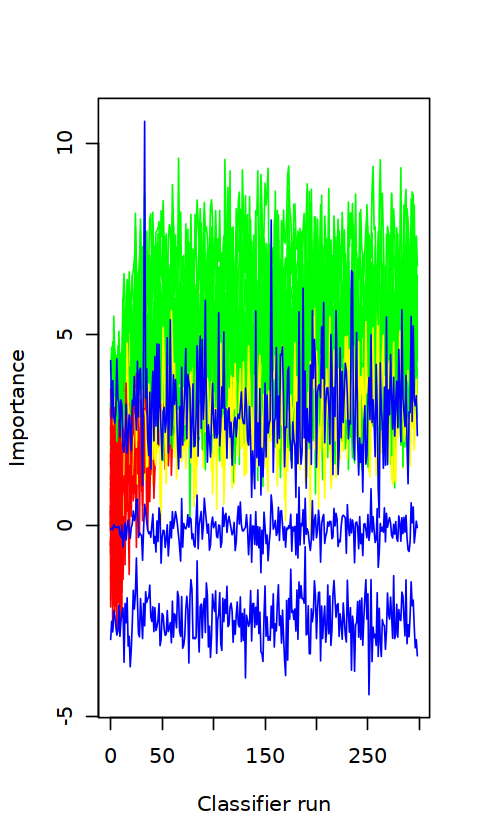

In [40]:
Boruta::plotImpHistory(boruta)

In [41]:
library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


In [42]:
boruta

Boruta performed 299 iterations in 20.46549 secs.
 14 attributes confirmed important: AMPH, BAIAP3, GLRX2, GLRX5, HS3ST2
and 9 more;
 123 attributes confirmed unimportant: AACS, ACOT7, ACTR10, ACTR1B,
ADORA1 and 118 more;
 3 tentative attributes left: ARMCX2, EIF1B, REPS2;

Welcome to YSX package which is a collection of useful scripts.
This package does not require you install all depended packages, since one may not need all functions in this package.
However, when there is a message implying some functions are missing,please install these packages manually.
Or more specially, check Plot.Rmd in vignettes first.




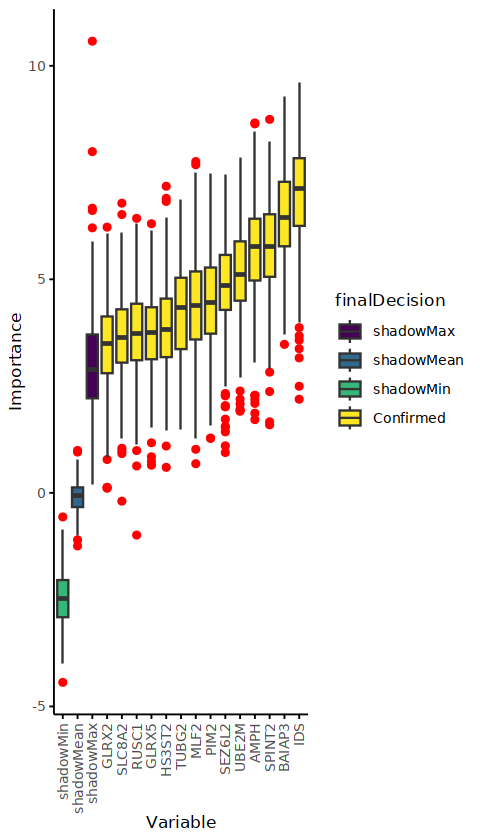

In [43]:
library(YSX)

sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
           legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
           xtics_angle = 90)

In [44]:
# lasso

In [45]:
library(lars) 
library(glmnet) 

Warning message:
"package 'lars' was built under R version 4.2.3"
Loaded lars 1.3


Warning message:
"package 'glmnet' was built under R version 4.2.3"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.2.3"
Loaded glmnet 4.1-8



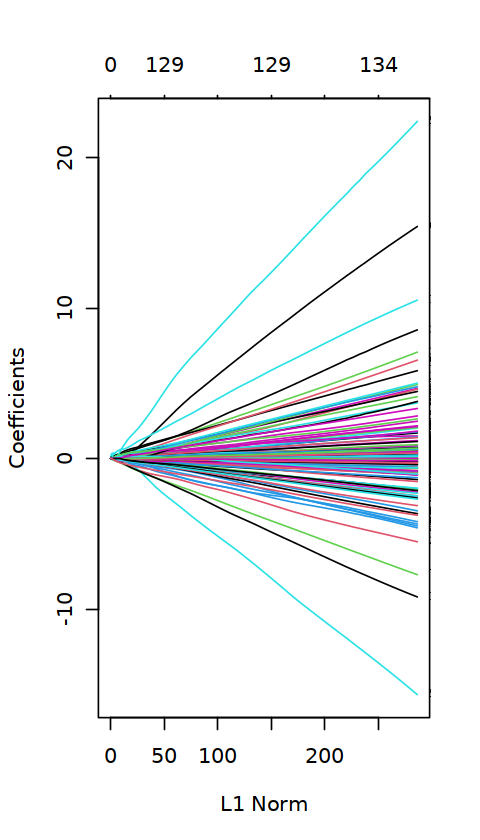

In [46]:
#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=100, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

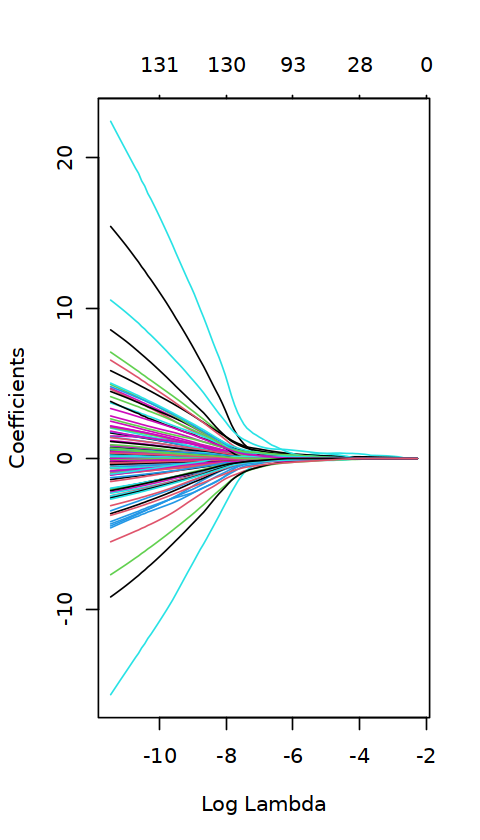

In [47]:
plot(model_lasso, xvar="lambda", label=TRUE)

In [48]:
cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)

[1] 0.03731813 0.10383992

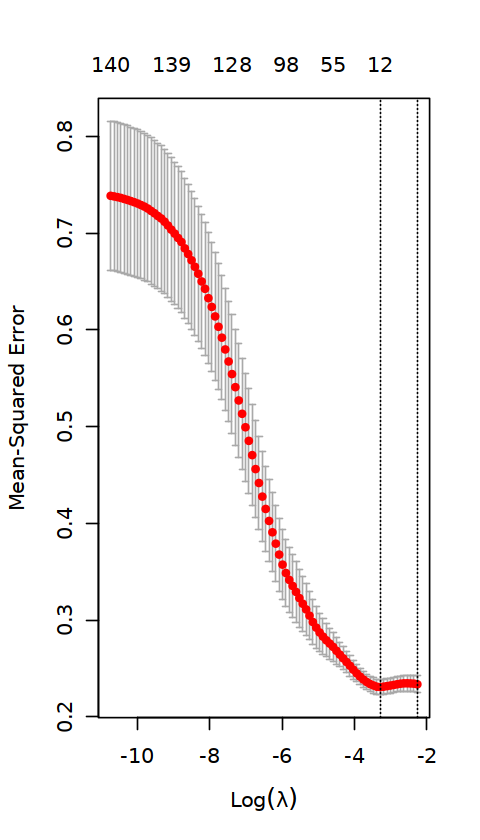

In [49]:
plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

In [50]:
model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.min)
gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
gene_1se = gsub('[.]',' ',gene_1se)

In [51]:
gene_1se

[1] "TRIAP1" "HSPB11" "BAIAP3" "MRPL46" "PIM2"   "DBP"    "HS3ST2" "VTI1B" 
 [9] "PRSS3"  "TUBG2"  "STMN4"  "IDS"

### 韦恩图

In [52]:
RF.gene = names(rfGenes)[1:length(a)]
#SVF.RFE.gene = featureGenes
#XGBoost.gene = importance$Feature[1:length(a)]

In [53]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()

In [54]:
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [55]:
lasso.gene  = gene_1se

In [56]:
list1 = list(RF.gene,lasso.gene,Boruta.gene)

In [57]:
data =  as.data.frame (do.call (cbind, list1))

Warning message in (function (..., deparse.level = 1) :
"number of rows of result is not a multiple of vector length (arg 2)"


In [58]:

library(venn)
        library(VennDiagram)
        color=c( "#3C5488B2","#00A087B2", 
             "#F39B7FB2","#91D1C2B2", 
             "#8491B4B2", "#DC0000B2", 
             "#7E6148B2","yellow", 
             "darkolivegreen1", "lightskyblue", 
             "darkgreen", "deeppink", "khaki2", 
             "firebrick", "brown1", "darkorange1", 
             "cyan1", "royalblue4", "darksalmon", 
             "darkgoldenrod1", "darkseagreen", "darkorchid")

    if (ncol(data) == 2){
        sample_list <- list(c1 = data[,1], c2 = data[,2])
    }else if(ncol(data) == 3){
        sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
    }else if(ncol(data) == 4){
        sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
    }else{
        sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
    }
    
    q <- venn.diagram(sample_list,filename = NULL,
             fill = color[1:(length(sample_list))],
             alpha = 0.50, cat.col = rep('black', ncol(data)), 
             col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
                             )
    pdf(paste0('./',"venn.pdf"))
    grid.draw(q)
    dev.off()

Warning message:
"package 'venn' was built under R version 4.2.3"
Loading required package: grid

Loading required package: futile.logger

Warning message:
"package 'futile.logger' was built under R version 4.2.3"


png 
  2

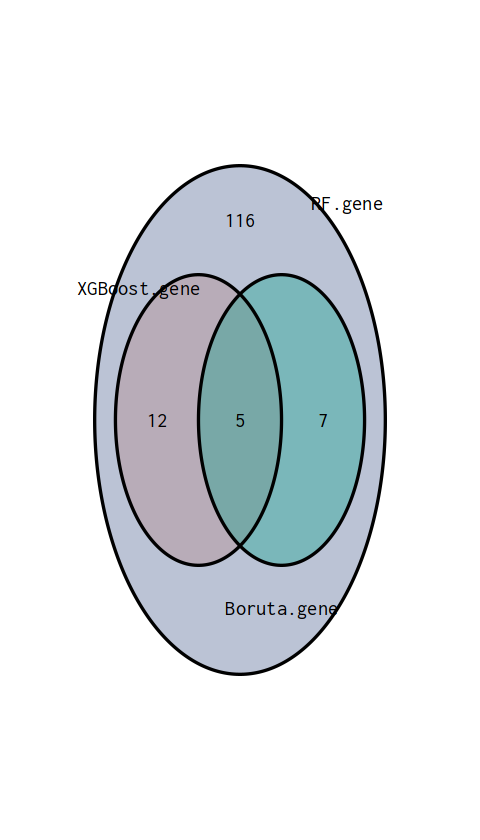

In [59]:
grid.draw(q)

In [60]:
#model.gene = intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),lasso.gene)

In [226]:
model.gene = intersect(lasso.gene,Boruta.gene)

In [187]:
model.gene  =RF.gene[1:15]

In [227]:
model.gene

[1] "BAIAP3" "PIM2"   "HS3ST2" "TUBG2"  "IDS"

In [228]:
set.seed(1234)

In [229]:
#expr3[expr3$Group =='MDD',]$Group<-1

In [230]:

#expr3[expr3$Group =='Control',]$Group<-0
#expr3$Group = as.numeric(expr3$Group)

In [231]:
#table(Type)

In [232]:
expr4 = expr3 %>% dplyr::select(c(Group,model.gene))

In [233]:
dim(expr4)

[1] 357   6

In [234]:
head(expr4,7)

,Group,BAIAP3,PIM2,HS3ST2,TUBG2,IDS
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431721,CON,36.35499,11.839229,21.02774,59.62754,185.1628
GSM2431722,CON,51.07355,14.067211,35.27435,65.20306,196.8864
GSM2431723,CON,62.30394,11.477057,22.99172,53.41445,191.1461
GSM2431726,CON,38.46911,12.833435,12.77582,40.38923,170.3437
GSM2431727,CON,62.36641,11.952089,26.15294,65.20837,194.2342
GSM2431728,MDD,62.95311,13.903008,33.64221,69.38123,203.0814
GSM2431731,MDD,54.41643,8.567436,18.91940,59.67236,191.4579


In [235]:
expr4$Group = ifelse(expr4$Group == 'CON',0,1)

In [236]:
library(caret)
library(ggplot2)

 a = c()
# 
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )
    if (res$auc > 0.5){
        a = append(a,i)
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}else{
        
}

    
    }

[1] "BAIAP3 0.658064735482116"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 358 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PIM2 0.614749082007344"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 358 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "HS3ST2 0.607847137222902"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 358 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TUBG2 0.632139942880457"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 356 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "IDS 0.622739018087855"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 358 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


### 批量单因素逻辑回归

In [237]:
a

[1] "BAIAP3" "PIM2"   "HS3ST2" "TUBG2"  "IDS"

In [238]:
expr4 = expr4[,c('Group',a)]

In [239]:
#expr4 =expr4

In [240]:
#expr4 = expr3

In [241]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

In [242]:
varsU<-names(expr4[,2:dim(expr4)[2]])

In [243]:
Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



In [244]:
Result

,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BAIAP3,0.02760230,0.008168021,3.379313,0.0007266730,1.027987,1.012393,1.045495,BAIAP3
PIM2,0.16865243,0.050215310,3.358586,0.0007834237,1.183709,1.074400,1.308807,PIM2
HS3ST2,0.05621124,0.015596811,3.604021,0.0003133314,1.057821,1.026639,1.091568,HS3ST2
TUBG2,0.04396916,0.012254548,3.587987,0.0003332404,1.044950,1.020766,1.071149,TUBG2
IDS,0.00903459,0.003093490,2.920517,0.0034945134,1.009076,1.003231,1.015549,IDS


In [245]:
Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

In [246]:
tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

In [247]:
Uni_log[tzgene,]

,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BAIAP3,0.02760230,0.0007266730,1.027987,1.012393,1.045495,BAIAP3
PIM2,0.16865243,0.0007834237,1.183709,1.074400,1.308807,PIM2
HS3ST2,0.05621124,0.0003133314,1.057821,1.026639,1.091568,HS3ST2
TUBG2,0.04396916,0.0003332404,1.044950,1.020766,1.071149,TUBG2
IDS,0.00903459,0.0034945134,1.009076,1.003231,1.015549,IDS


### 多因素分析

In [248]:
tzgene

[1] "BAIAP3" "PIM2"   "HS3ST2" "TUBG2"  "IDS"

In [249]:
data = expr4[,c('Group',tzgene)]

In [250]:
#data = expr4

In [251]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9565  -0.9480  -0.6947   1.1517   3.4009  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.827498   1.272039  -5.367 7.99e-08 ***
BAIAP3       0.021859   0.008958   2.440   0.0147 *  
PIM2         0.141896   0.055163   2.572   0.0101 *  
HS3ST2       0.039175   0.017956   2.182   0.0291 *  
TUBG2        0.017341   0.015396   1.126   0.2600    
IDS          0.006503   0.003508   1.854   0.0638 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 467.09  on 356  degrees of freedom
Residual deviance: 427.51  on 351  degrees of freedom
AIC: 439.51

Number of Fisher Scoring iterations: 4


Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-6.827,28.809,0.001(0~0.012),<0.001
BAIAP3,0.022,5.954,1.022(1.005~1.041),0.015
PIM2,0.142,6.617,1.152(1.035~1.286),0.010
HS3ST2,0.039,4.760,1.04(1.004~1.078),0.029
TUBG2,0.017,1.269,1.017(0.987~1.049),0.260
IDS,0.007,3.436,1.007(1~1.014),0.064


In [252]:
fit.reduce<-glm(Group~. ,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9565  -0.9480  -0.6947   1.1517   3.4009  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.827498   1.272039  -5.367 7.99e-08 ***
BAIAP3       0.021859   0.008958   2.440   0.0147 *  
PIM2         0.141896   0.055163   2.572   0.0101 *  
HS3ST2       0.039175   0.017956   2.182   0.0291 *  
TUBG2        0.017341   0.015396   1.126   0.2600    
IDS          0.006503   0.003508   1.854   0.0638 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 467.09  on 356  degrees of freedom
Residual deviance: 427.51  on 351  degrees of freedom
AIC: 439.51

Number of Fisher Scoring iterations: 4


In [253]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=439.51
Group ~ BAIAP3 + PIM2 + HS3ST2 + TUBG2 + IDS

         Df Deviance    AIC
- TUBG2   1   428.78 438.78
<none>        427.51 439.51
- IDS     1   431.15 441.15
- HS3ST2  1   432.39 442.39
- BAIAP3  1   433.87 443.87
- PIM2    1   434.27 444.27

Step:  AIC=438.78
Group ~ BAIAP3 + PIM2 + HS3ST2 + IDS

         Df Deviance    AIC
<none>        428.78 438.78
+ TUBG2   1   427.51 439.51
- IDS     1   433.46 441.46
- PIM2    1   434.78 442.78
- HS3ST2  1   437.36 445.36
- BAIAP3  1   439.32 447.32



Call:
glm(formula = Group ~ BAIAP3 + PIM2 + HS3ST2 + IDS, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8060  -0.9513  -0.6880   1.1540   3.3512  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.170473   1.110802  -5.555 2.78e-08 ***
BAIAP3       0.025909   0.008326   3.112  0.00186 ** 
PIM2         0.131397   0.054146   2.427  0.01524 *  
HS3ST2       0.047320   0.016502   2.868  0.00414 ** 
IDS          0.007190   0.003446   2.087  0.03691 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 467.09  on 356  degrees of freedom
Residual deviance: 428.78  on 352  degrees of freedom
AIC: 438.78

Number of Fisher Scoring iterations: 4


In [254]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-6.170,30.858,0.002(0~0.017),<0.001
BAIAP3,0.026,9.684,1.026(1.01~1.044),0.002
PIM2,0.131,5.889,1.14(1.026~1.27),0.015
HS3ST2,0.047,8.223,1.048(1.016~1.084),0.004
IDS,0.007,4.355,1.007(1.001~1.014),0.037


In [255]:
b = rownames(formatFit(logit.step))

Waiting for profiling to be done...



In [256]:
c = b[2:length(b)]

In [257]:
c

[1] "BAIAP3" "PIM2"   "HS3ST2" "IDS"

In [258]:
data = data[,c('Group',c)]

In [259]:
#data = expr4

In [260]:
#data$Group = as.factor(data$Group)

In [261]:
library(autoReg)

In [262]:
overall.log =  glm( Group~.,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

name,desc,0 (N=228),1 (N=129),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BAIAP3,Mean <U+00B1> SD,55.6 <U+00B1> 13.8,61.7 <U+00B1> 18.1,BAIAP3,"1.03 (1.01-1.04, p<.001)","1.03 (1.01-1.04, p=.002)"
PIM2,Mean <U+00B1> SD,12.1 <U+00B1> 2.2,12.9 <U+00B1> 2.4,PIM2,"1.18 (1.07-1.31, p<.001)","1.14 (1.03-1.27, p=.015)"
HS3ST2,Mean <U+00B1> SD,20.1 <U+00B1> 7.1,23.2 <U+00B1> 8.1,HS3ST2,"1.06 (1.03-1.09, p<.001)","1.05 (1.02-1.08, p=.004)"
IDS,Mean <U+00B1> SD,189.6 <U+00B1> 35.0,203.1 <U+00B1> 48.1,IDS,"1.01 (1.00-1.02, p=.004)","1.01 (1.00-1.01, p=.037)"


In [263]:
library(caret)

In [270]:
set.seed(10|1)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=10)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=train)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(train[,1]),model_pre)))
}
mean(auc_value)
auc_value

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.704599

[1] 0.6884733 0.7145095 0.7140962 0.7070201 0.7021062 0.6857618 0.7041199
 [8] 0.7080353 0.7006074 0.7212601

In [271]:
num <- which.max(auc_value)
print(num)

fold_test <- data[folds[[num]],]   
fold_train <- data[-folds[[num]],]

fold_pre <- glm(Group~.,data=fold_train,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=fold_test)

options(repr.plot.width = 6)

[1] 10


Setting levels: control = 0, case = 1

Setting direction: controls < cases



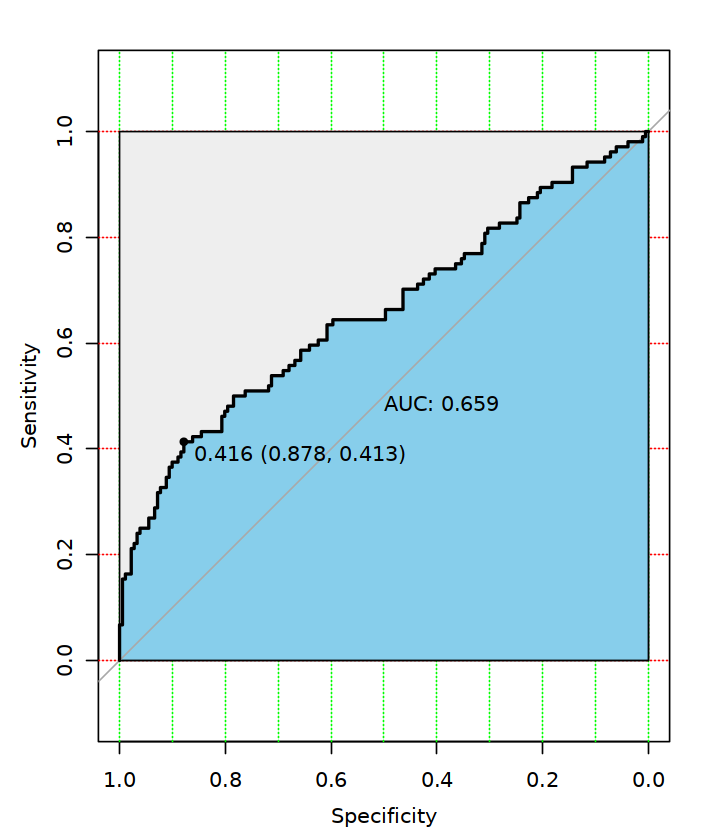

In [272]:
roc_curve <- pROC::roc(as.numeric(fold_test$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [111]:
summary(fit.reduce) #查看构建的模型
fitted.prob<-predict(fit.reduce, newdata = data, type = "response")  #这里不需要变动
data$pred<-fit.reduce$fitted.values
m<-pROC::roc(data$Group,data[,"pred"])  #这里要把Y改为自己的结局变量即可


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5757  -0.9417  -0.7173   1.1619   2.8474  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.37320    1.12503  -4.776 1.79e-06 ***
BAIAP3       0.02264    0.00891   2.540  0.01107 *  
CHRM4        0.01371    0.01696   0.809  0.41880    
F12          0.26560    0.17747   1.497  0.13449    
HS3ST2       0.04689    0.01714   2.736  0.00621 ** 
NDUFB6       0.02933    0.01840   1.594  0.11091    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 467.09  on 356  degrees of freedom
Residual deviance: 433.37  on 351  degrees of freedom
AIC: 445.37

Number of Fisher Scoring iterations: 4


Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [99]:
options(repr.plot.width = 6)

Area under the curve: 0.8747

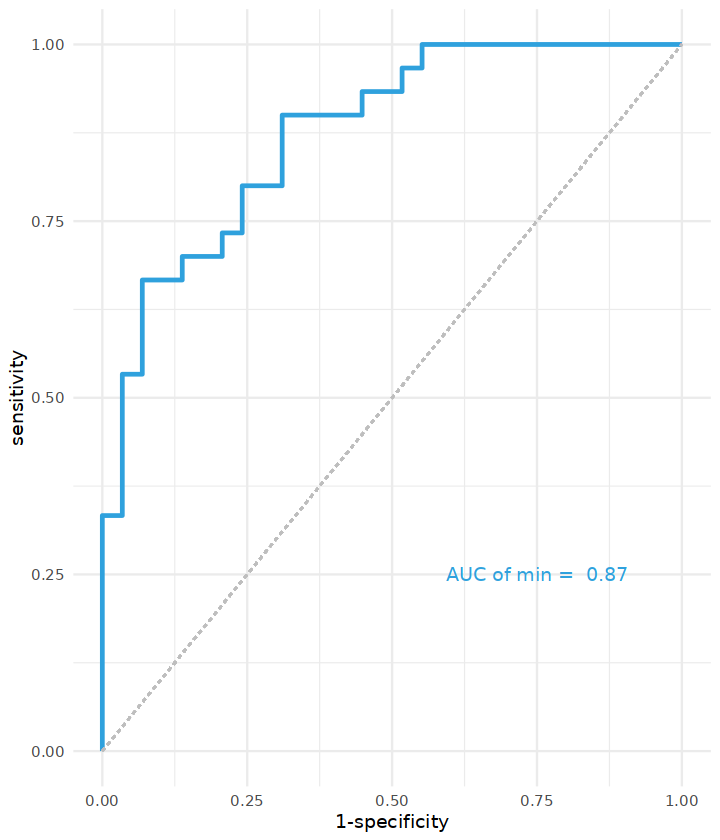

In [100]:
g <- pROC::ggroc(m,legacy.axes = T,size = 1,color = "#2fa1dd")
pROC::auc(m)  # Area under the curve: 0.9953

g + theme_minimal() +
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), 
               colour = "grey", linetype = "dashed")+
  annotate("text",x = .75, y = .25,
           label = paste("AUC of min = ",format(round(as.numeric(pROC::auc(m)),2),nsmall = 2)),color = "#2fa1dd")

In [101]:
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 4.2.3"


In [102]:
dd<-datadist(data)  #开始打包数据
options(datadist="dd")

In [103]:
data$Group = as.factor(data$Group)

In [104]:
fit1 <- lrm(Group~RPE65 + DRD3+ MC3R+RELB  + PRF1, data=data,x=T,y=T)


In [105]:
fit1

Logistic Regression Model

lrm(formula = Group ~ RPE65 + DRD3 + MC3R + RELB + PRF1, data = data, 
    x = T, y = T)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs            59    LR chi2      30.80     R2       0.542    C       0.875    
 0             29    d.f.             5     R2(5,59) 0.354    Dxy     0.749    
 1             30    Pr(> chi2) <0.0001    R2(5,44.2)0.442    gamma   0.749    
max |deriv| 3e-09                           Brier    0.146    tau-a   0.381    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept  9.1037 4.5460  2.00  0.0452  
RPE65     -1.4752 0.5688 -2.59  0.0095  
DRD3      -1.0804 0.5528 -1.95  0.0507  
MC3R      -1.2752 0.5846 -2.18  0.0291  
RELB      -0.1619 0.7859 -0.21  0.8367  
PRF1      -0.7167 0.4253 -1.69  0.0920  


In [106]:
#  https://blog.csdn.net/Ayue0616/article/details/126601832

In [107]:
# cal1 <- calibrate(fit1, method='boot', B=1000) 
# plot(cal1,xlim=c(0,1.0),ylim=c(0,1.0))

### https://blog.51cto.com/u_15172991/5428282  模型图的解释参考链接

In [117]:
# https://ayueme.github.io/R_clinical_model/nomogram-essential.html

In [ ]:
# https://blog.csdn.net/Dr_long1996/article/details/135446784

In [118]:
fit1

Logistic Regression Model

lrm(formula = Group ~ RPE65 + DRD3 + MC3R + RELB + PRF1, data = data, 
    x = T, y = T)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs            59    LR chi2      30.80     R2       0.542    C       0.875    
 0             29    d.f.             5     R2(5,59) 0.354    Dxy     0.749    
 1             30    Pr(> chi2) <0.0001    R2(5,44.2)0.442    gamma   0.749    
max |deriv| 3e-09                           Brier    0.146    tau-a   0.381    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept  9.1037 4.5460  2.00  0.0452  
RPE65     -1.4752 0.5688 -2.59  0.0095  
DRD3      -1.0804 0.5528 -1.95  0.0507  
MC3R      -1.2752 0.5846 -2.18  0.0291  
RELB      -0.1619 0.7859 -0.21  0.8367  
PRF1      -0.7167 0.4253 -1.69  0.0920  


In [109]:
save(fit1,data,file = 'bulk2.fit1.rda')

In [110]:
#列线图代码只能在Rstudio话

In [111]:
# library('regplot')
# regplot(fit1,
#         plots = c("violin", "boxes"), ##连续性变量形状，可选"no plot" "density" "boxes" "ecdf" "bars" "boxplot" "violin" "bean" "spikes"；分类变量的形状，可选"no plot" "boxes" "bars" "spikes"
#         observation = data[1,], #用哪行观测，或者T F
#         center = T, # 对齐变量
#         subticks = T,
#         droplines = T,#是否画竖线
#         title = "nomogram",
#         points = T, # 截距项显示为0-100
#         odds = T, # 是否显示OR值
#         showP = T, # 是否显示变量的显著性标记
#         rank = "sd", # 根据sd给变量排序
#         interval="confidence", # 展示可信区间
#         clickable = F # 是否可以交互
# )

In [112]:
fit.result<-summary(fit.reduce)
df1<-fit.result$coefficients
df2<-confint(fit.reduce)
df3<-cbind(df1,df2)
df4<-data.frame(df3[-1,c(1,4,5,6)])
df4$Var<-rownames(df4)
colnames(df4)<-c("OR","Pvalue","OR_1","OR_2","Var")
df5<-df4[,c(5,1,2,3,4)]
df5$OR_mean<-df5$OR
df5$OR<-paste0(round(df5$OR,2),
               "(",
               round(df5$OR_1,2),
               "~",
               round(df5$OR_2,2),
               ")")
df5$Pvalue<-round(df5$Pvalue,3)
write.csv(df5,file = "forestplot_example.csv",
          quote = F,row.names = F)

Waiting for profiling to be done...



In [116]:
library(forestplot)
fp<-read.csv("forestplot_example.csv",header=T)

# forestplot(labeltext=as.matrix(fp[,1:3]),
#            mean=fp$OR_mean,
#            lower=fp$OR_1,
#            upper=fp$OR_2,
#            zero=0,
#            boxsize=0.2,
#            graph.pos=2)

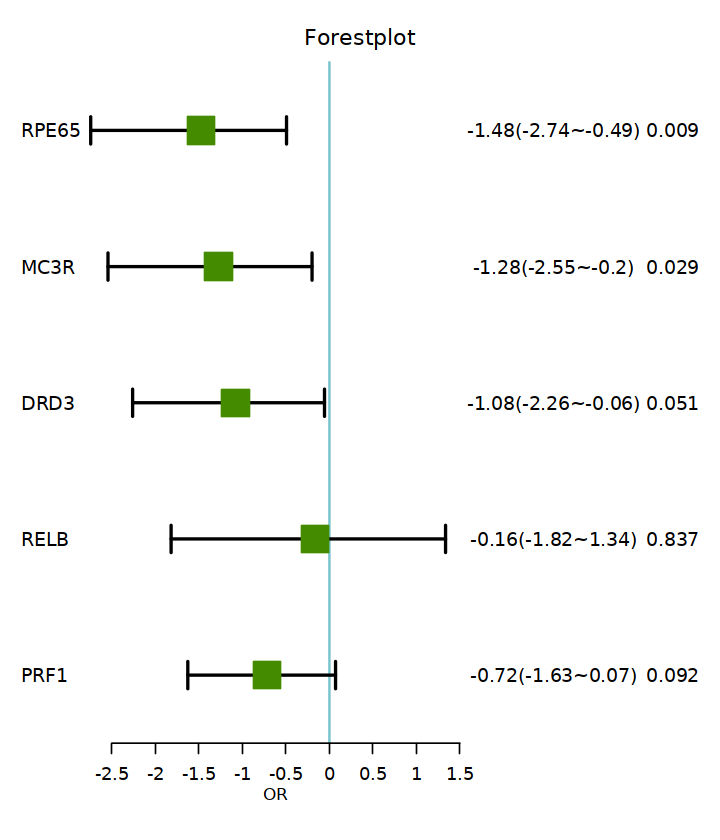

In [115]:
forestplot(labeltext=as.matrix(fp[,1:3]),
           mean=fp$OR_mean,
           lower=fp$OR_1,
           upper=fp$OR_2,
           zero=0,
           boxsize=0.2,
           lineheight = unit(7,'mm'),
           colgap=unit(2,'mm'),
           lwd.zero=1.5,
           lwd.ci=2, 
           col=fpColors(box='#458B00',
                        summary='#8B008B',
                        lines = 'black',
                        zero = '#7AC5CD'),
           xlab="OR",
           lwd.xaxis =1,
           txt_gp = fpTxtGp(ticks = gpar(cex = 0.85),
                            xlab  = gpar(cex = 0.8),
                            cex = 0.9),
           lty.ci = "solid",
           title = "Forestplot", 
           line.margin = 0.08,
           graph.pos=2)


In [209]:
nmfinput= data[MDD,c('RPE65' ,'DRD3','MC3R','RELB' , 'PRF1')] %>%  t() %>%  as.data.frame()

In [210]:
library(NMF)

In [211]:
ranks <- 1:10
estim.coad <- nmf(nmfinput,ranks, nrun=10)
duplicated(colnames(nmfinput))

Warning message in cor(d.consensus, d.coph, method = "pearson"):
"the standard deviation is zero"


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE

Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 11 rows containing missing values (`geom_point()`)."


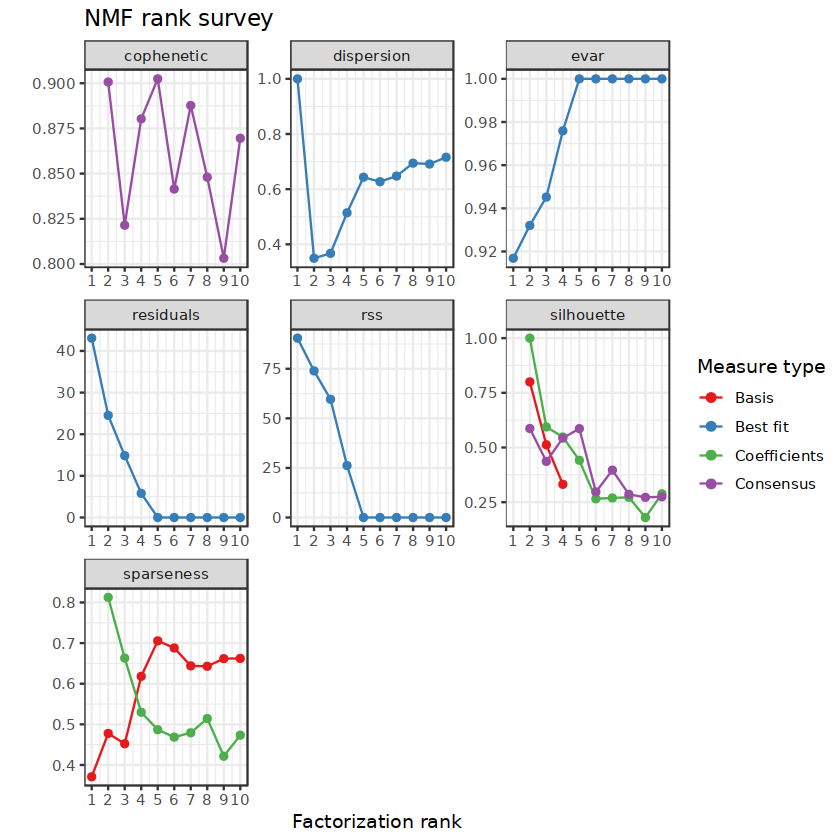

In [212]:
plot(estim.coad)

In [213]:
seed = 2020820
nmf.rank4 <- nmf(nmfinput, 
                 rank = 2, 
                 nrun=50,
                 seed = seed, 
                 method = "brunet")

group
 1  2 
21  9 

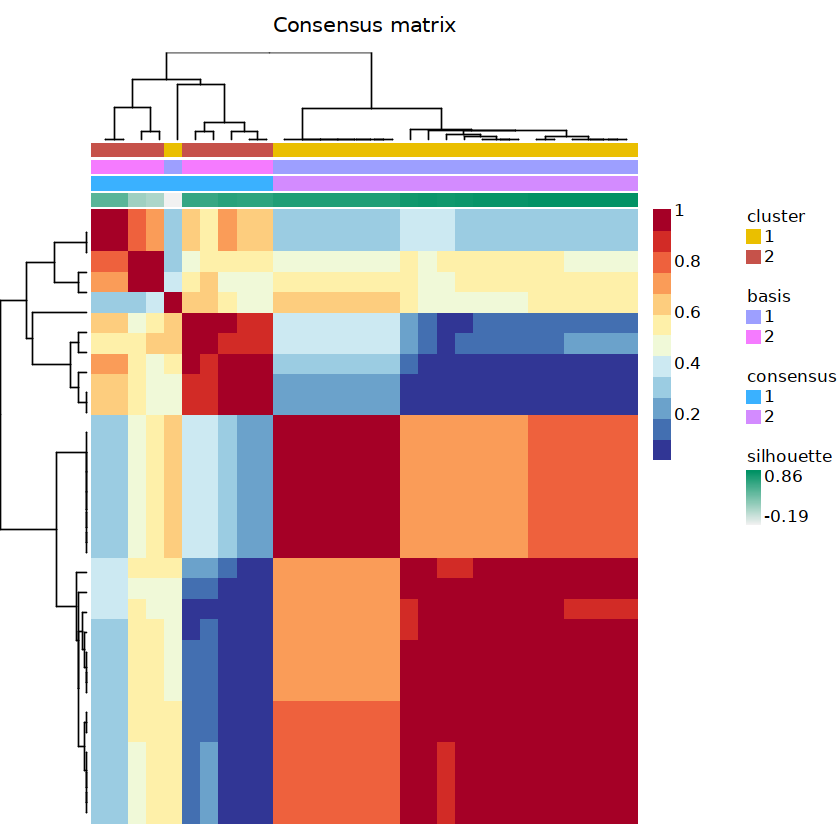

In [214]:
jco <- c("#EABF00","#C6524A","#868686")
index <- extractFeatures(nmf.rank4,"max") 
sig.order <- unlist(index)
NMF.Exp.rank4 <- nmfinput[sig.order,]
NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
group <- predict(nmf.rank4) # 提出亚型
table(group)
consensusmap(nmf.rank4,
             labRow = NA,
             labCol = NA,
             annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
             annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

In [215]:
library(tinyarray)

In [225]:
data1 = data[MDD,-1] %>%  t() %>% as.data.frame()

In [226]:
a = data1[,colnames(nmfinput)]

In [227]:
cg=names(tail(sort(apply(a,1,sd)),12000))
n=a[cg,]

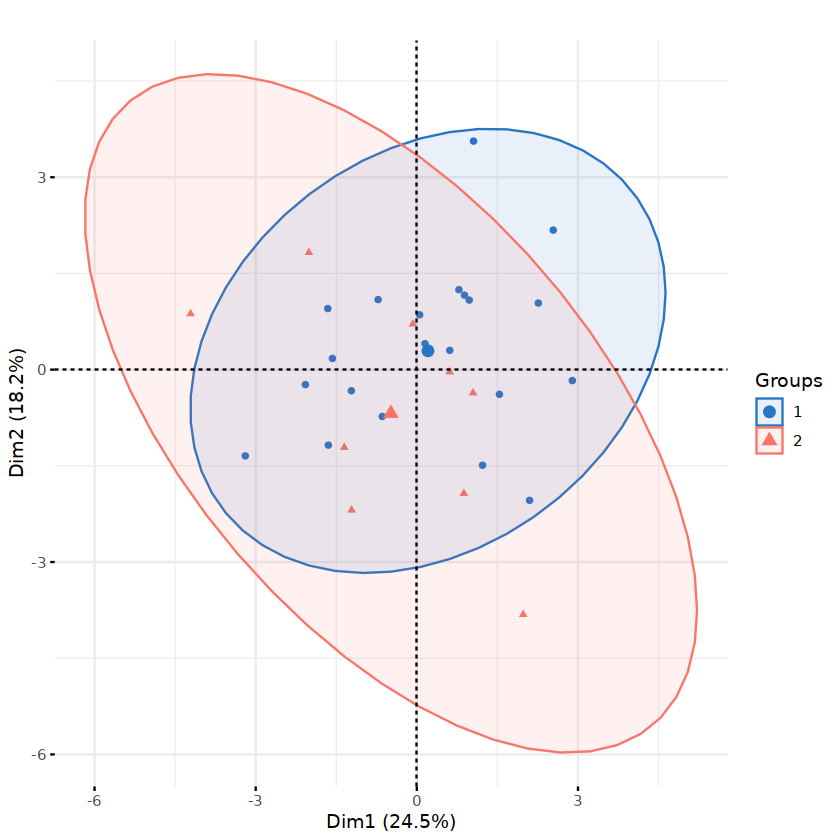

In [228]:
draw_pca(n,group)

In [231]:
library(Rtsne)
tsne_out = Rtsne(t(n),perplexity = 1)
pdat = data.frame(tsne_out$Y,factor(group))
colnames(pdat) = c("Y1","Y2","group")
head(pdat)

,Y1,Y2,group
,<dbl>,<dbl>,<fct>
V10,49.59959,172.010281,2
V15,207.23713,-79.947753,2
V16,201.56723,-89.036425,1
V18,-43.43508,3.824127,2
V19,-185.23555,98.308446,1
V20,-37.09595,-82.671437,1


In [294]:
pdat1 = pdat %>% tibble::rownames_to_column(.,'sample')

In [295]:
bulk2.group = pdat1[,c(1,4)]
write.csv(bulk2.group,file = 'bulk2.group.csv',row.names =F)

In [296]:
dim(bulk2.group)

[1] 30  2

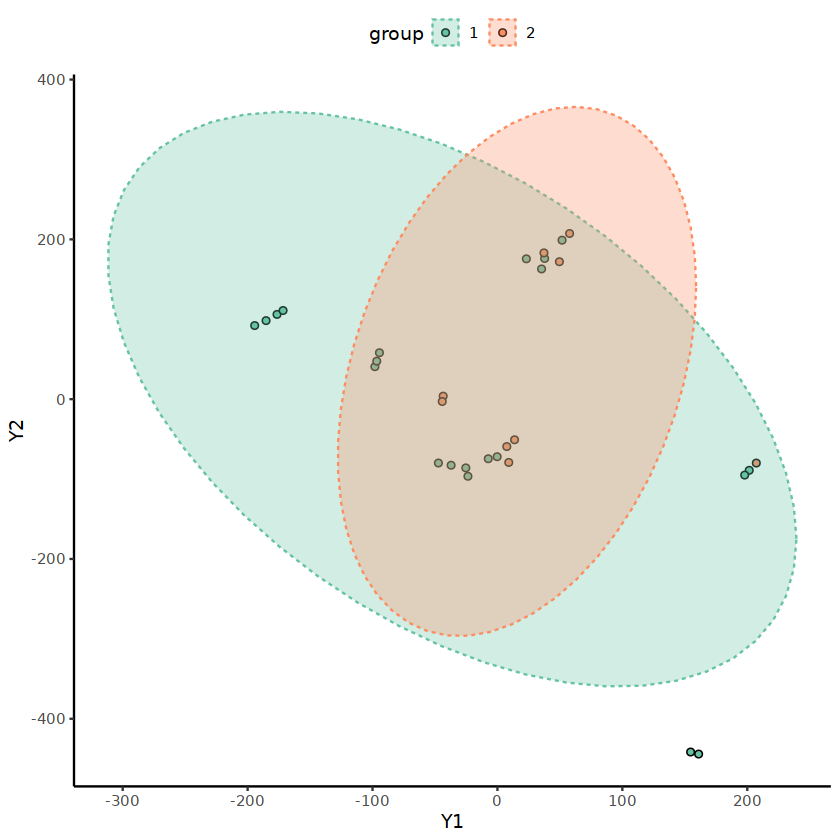

In [232]:
library(ggplot2)
library(paletteer)
ggplot(pdat,aes(Y1,Y2))+
  geom_point(aes(Y1,Y2,fill = group),shape = 21,color = "black")+
  stat_ellipse(aes(color = group,fill = group),
               geom = "polygon",
               alpha = 0.3,
               linetype = 2)+
  scale_color_paletteer_d("RColorBrewer::Set2")+
  scale_fill_paletteer_d("RColorBrewer::Set2")+
  theme_classic()+
  theme(legend.position = "top")